# 📈 Tesla Stock Price Prediction using LSTM
This notebook demonstrates how to build and train an LSTM model to predict Tesla's stock prices.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
tesla_data = pd.read_csv('TSLA.csv')
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0


### Visualize Closing Price

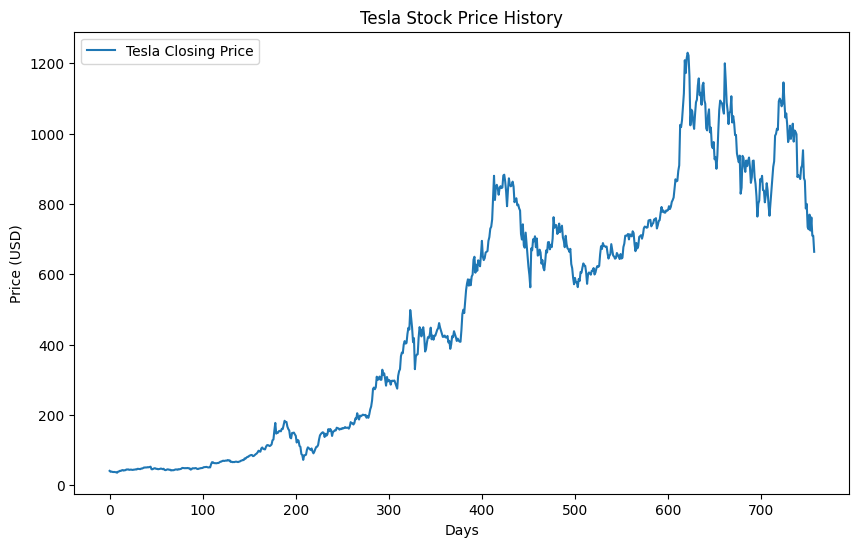

In [5]:
plt.figure(figsize=(10,6))
plt.plot(tesla_data['Close'], label='Tesla Closing Price')
plt.title('Tesla Stock Price History')
plt.xlabel('Days')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

###  Data Preprocessing

In [6]:
# Scaling data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(np.array(tesla_data['Close']).reshape(-1,1))

# Train-test split (80-20)
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

In [7]:
def create_dataset(dataset, time_step=60):
    X, y = [], []
    for i in range(len(dataset)-time_step-1):
        X.append(dataset[i:(i+time_step), 0])
        y.append(dataset[i+time_step, 0])
    return np.array(X), np.array(y)

time_step = 60
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape for LSTM [samples, timesteps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

###  Build LSTM Model

In [8]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_step,1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

###  Train the Model

In [9]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, batch_size=32,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stop], verbose=1)

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0673 - val_loss: 0.0333
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0047 - val_loss: 0.0071
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0019 - val_loss: 0.0057
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0012 - val_loss: 0.0054
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0013 - val_loss: 0.0055
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0011 - val_loss: 0.0054
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0011 - val_loss: 0.0051
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0010 - val_loss: 0.0050
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 9.8881e-04 - val_loss: 0.0053
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0013 - val_loss: 0.0050
Epoch 11/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 9.4886e-04 - val_loss: 0.0046
Epoch 12/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - l

###  Training & Validation Loss

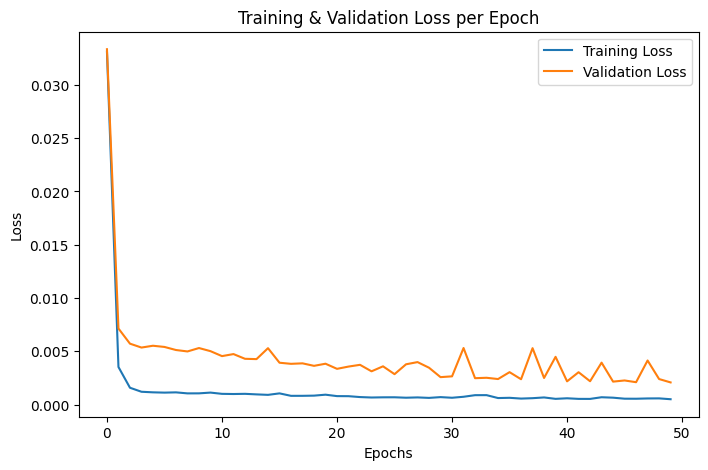

In [10]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

###  Predictions on Test Data

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


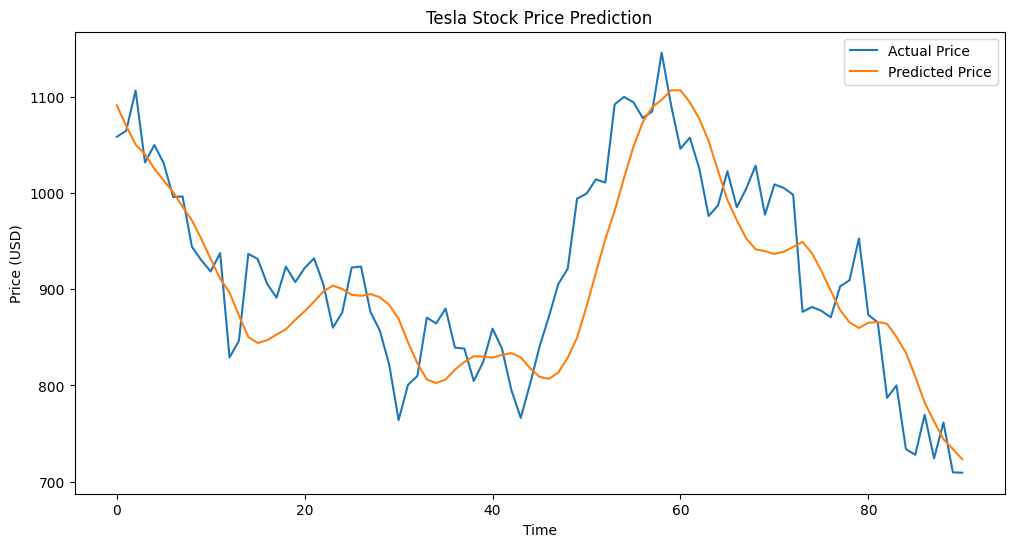

In [11]:
y_pred = model.predict(X_test)
y_predicted = scaler.inverse_transform(y_pred)
y_actual = scaler.inverse_transform(y_test.reshape(-1,1))

plt.figure(figsize=(12,6))
plt.plot(y_actual, label='Actual Price')
plt.plot(y_predicted, label='Predicted Price')
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

###  Future Forecast (Next 10 Days)

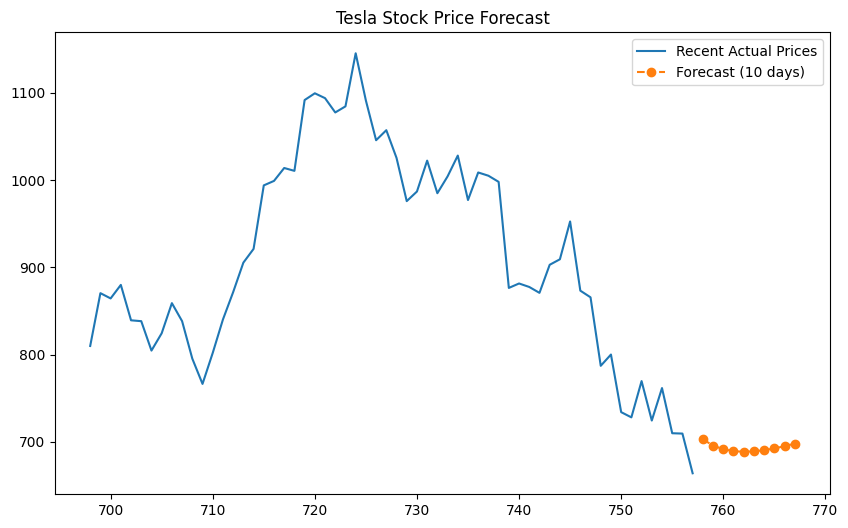

In [12]:
last_window = scaled_data[-time_step:]
future_input = last_window.reshape(1, time_step, 1)

future_preds = []
for _ in range(10):
    next_pred = model.predict(future_input, verbose=0)
    future_preds.append(next_pred[0,0])
    future_input = np.append(future_input[:,1:,:], [[next_pred[0]]], axis=1)

future_preds = scaler.inverse_transform(np.array(future_preds).reshape(-1,1))

plt.figure(figsize=(10,6))
plt.plot(tesla_data['Close'][-time_step:], label='Recent Actual Prices')
plt.plot(range(len(tesla_data), len(tesla_data)+10), future_preds,
         label='Forecast (10 days)', linestyle='dashed', marker='o')
plt.title('Tesla Stock Price Forecast')
plt.legend()
plt.show()

## Conclusion
- The LSTM model can capture Tesla stock trends.
- Predictions follow the actual trend but may miss short-term fluctuations.
- Future work: Hyperparameter tuning, adding more features (volume, news sentiment).